In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196
from IPython import display
import ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 11.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
from ultralytics import YOLO
from IPython.display import display,Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VBupYjcqRs7GEYUXI7lI")
project = rf.workspace("sign-language-6ccbk").project("final-isolt")
version = project.version(2)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...


RoboflowError: {
    "error": {
        "message": "Unsupported request. `GET /sign-language-6ccbk/final-isolt` does not exist or cannot be loaded due to missing permissions.",
        "type": "GraphMethodException",
        "hint": "You can see your active workspace by issuing a GET request to `/` with your `api_key`."
    }
}

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=40 imgsz=640

/content
100% 131M/131M [00:00<00:00, 284MB/s]
New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/final--2/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68164014 parameters, 0 gradients, 257.6 GFLOPs
val: Scanning /content/final--2/valid/labels.cache... 323 images, 3 backgrounds, 0 corrupt: 100% 323/323 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:20<00:00,  1.03it/s]
                   all        323        322      0.981      0.977      0.992        0.9
                  ADOU        323          6       0.97          1      0.995      0.795
                   AEN        323          8      0.983          1      0.995      0.969
                   ALF        323          6      0.981          1      0.995      0.946
              AML_GEAD        323          8      0.985      0.875      0.897       0.76
              ANA_ASIF        323          8      0.978          1      0.995      0.862
                  ANTA        323      

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68164014 parameters, 0 gradients, 257.6 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/159 /content/final--2/test/images/02b50815-5c8b-4002-a4b1-7fb6433949a0_jpg.rf.1be096d626e0fd8cee25b004fc4e6997.jpg: 640x640 1 ZAIN, 96.8ms
image 2/159 /content/final--2/test/images/03fbf6a9-2b90-4119-982c-555666ab13af_jpg.rf.5fa2a65aa63daf44fb437aabcb38d147.jpg: 640x640 1 ANA_ASIF, 1 MUDIR, 62.6ms
image 3/159 /content/final--2/test/images/0a1e0945-92f0-4e21-87dd-f2a00916f16d_jpg.rf.d1454a9bb995411447dcf374e678fbc5.jpg: 640x640 1 HAZA_RAHIB, 62.4ms
image 4/159 /content/final--2/test/images/0e048fd9-20de-4760-b42b-f73a0b91d756_jpg.rf.12de9caf9cc9c5c3956c7d64597385f5.jpg: 640x640 1 HA, 62.2ms
image 5/159 /content/final--2/test/images/14fa4229-94f1-445e-9cfc-2bd10a2d0e0c_jpg.rf.80c8cd475bf1f63d19658aa3344334b6.jpg: 640x640 1 RAA, 54.8ms
image 6/159 /content/final-

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[90]:
      display(Image(filename=image_path, width=600))
      print("\n")

/content


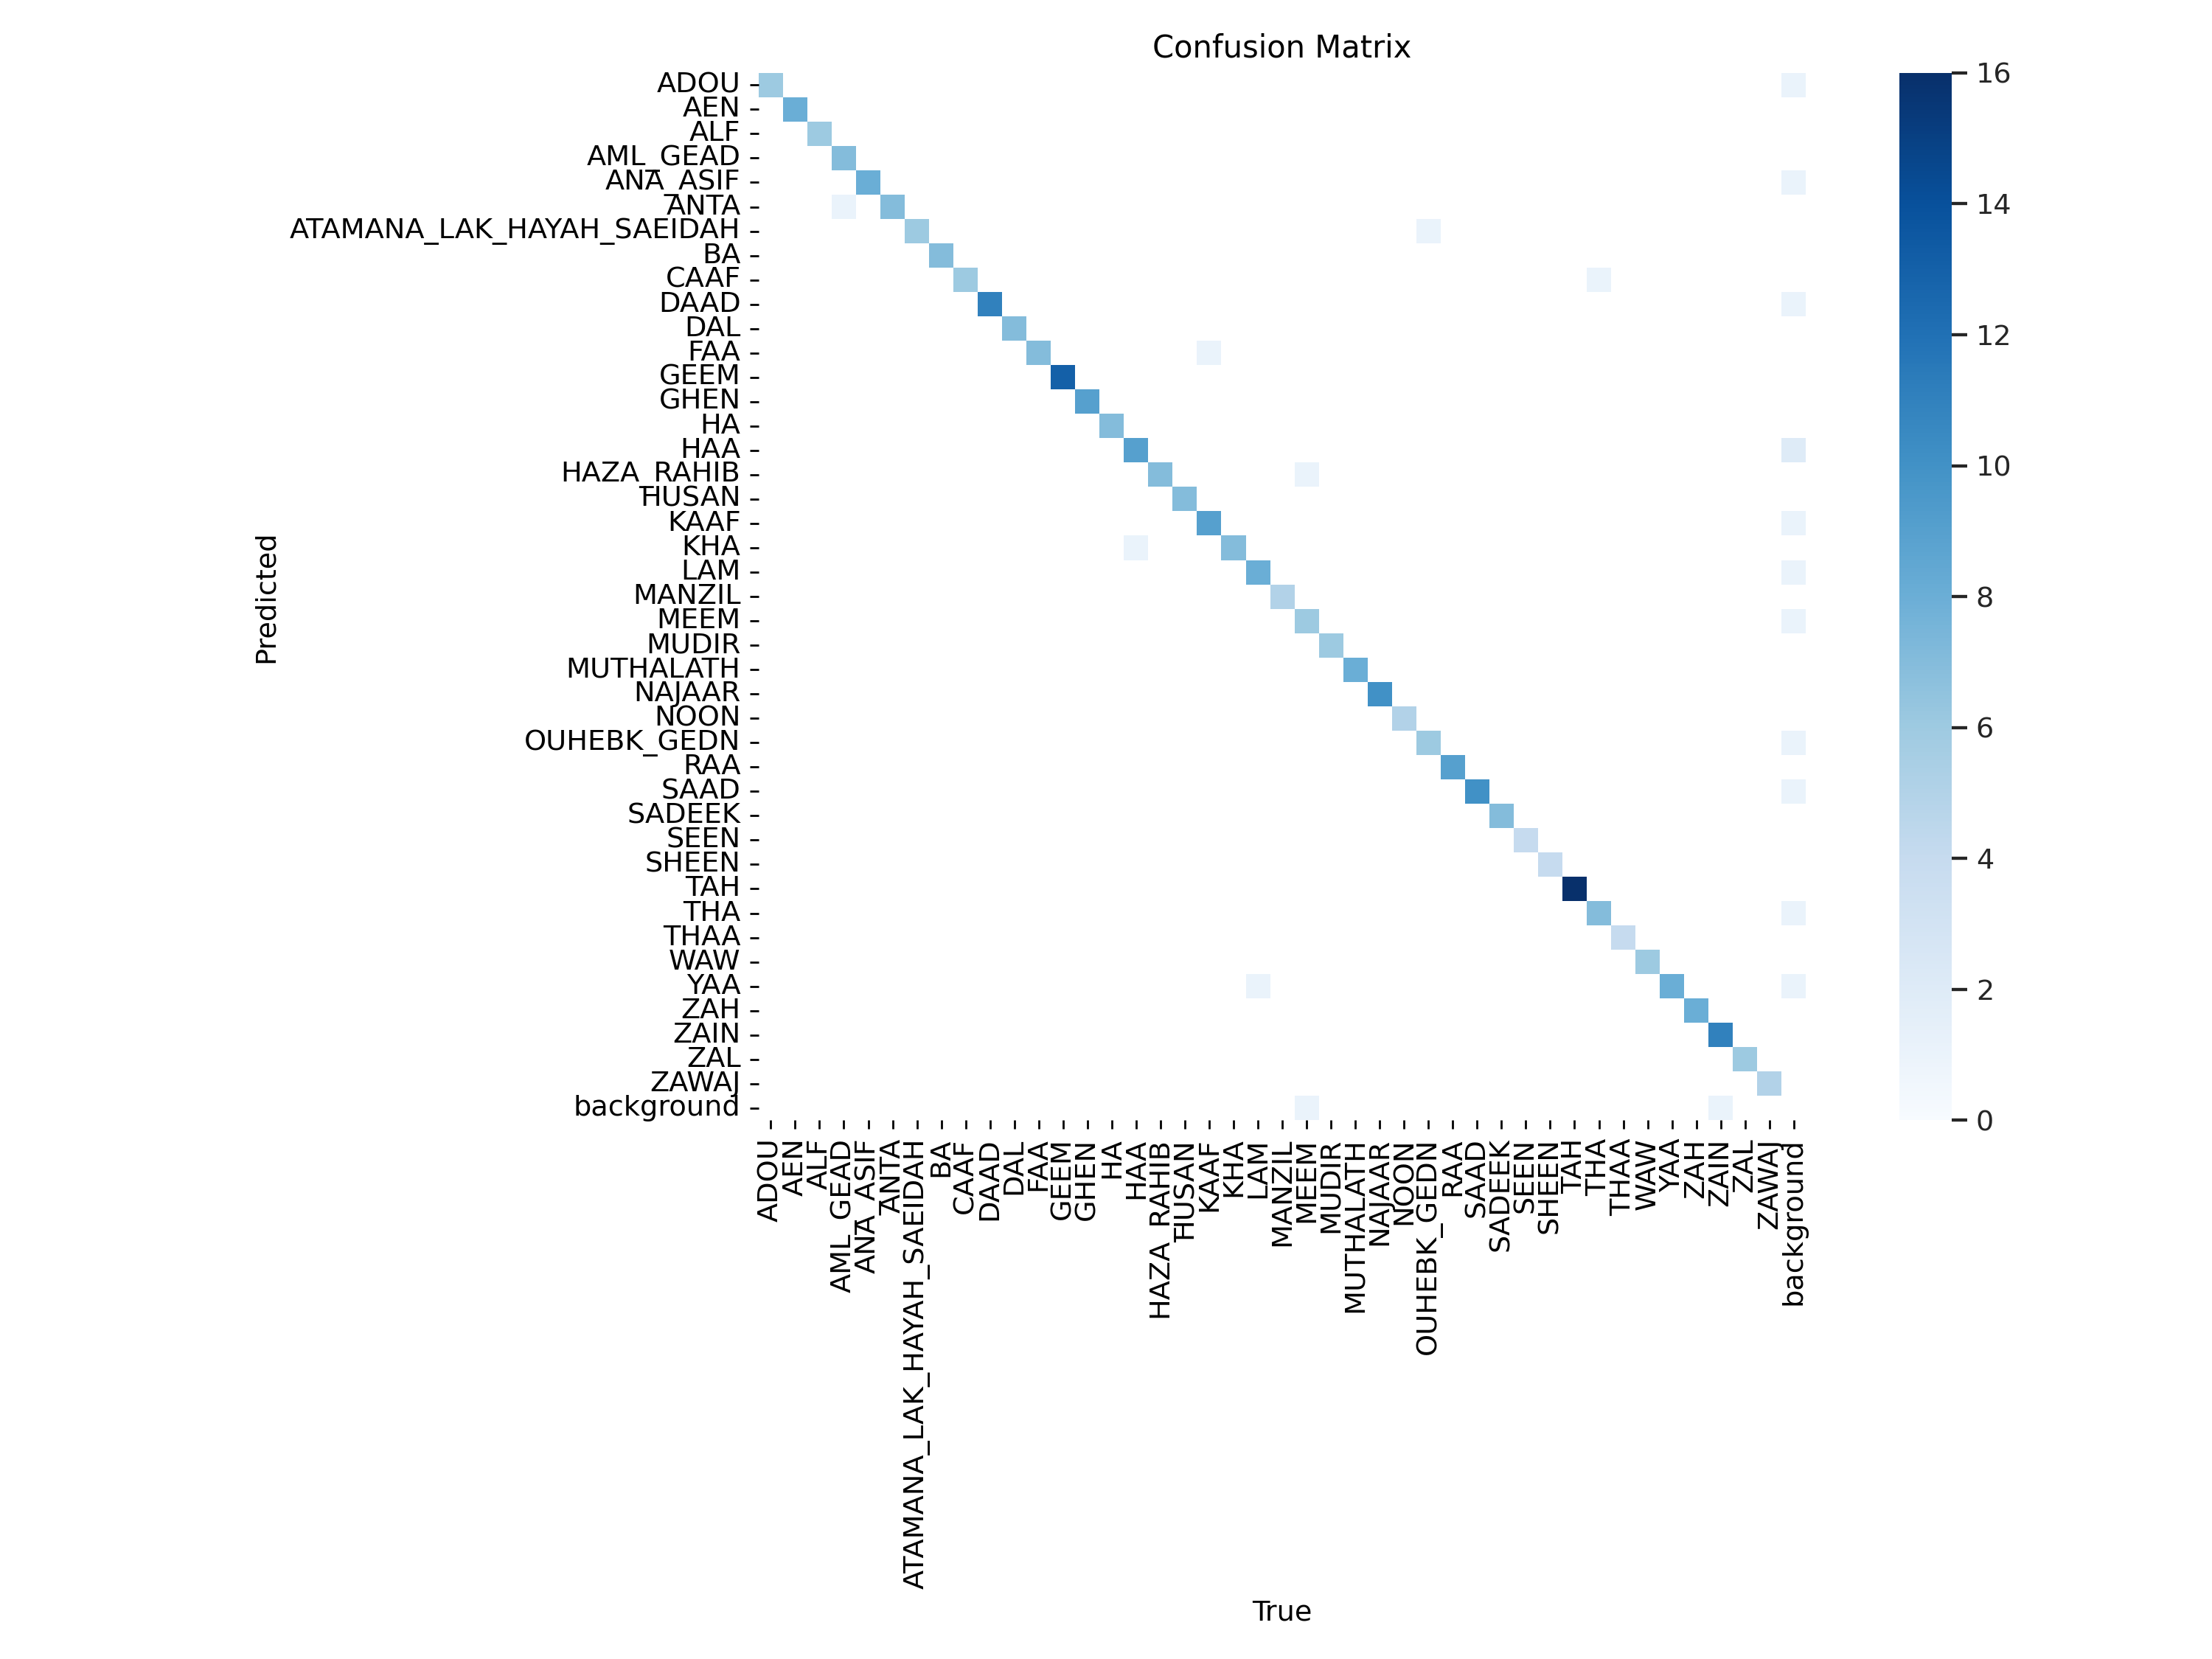

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


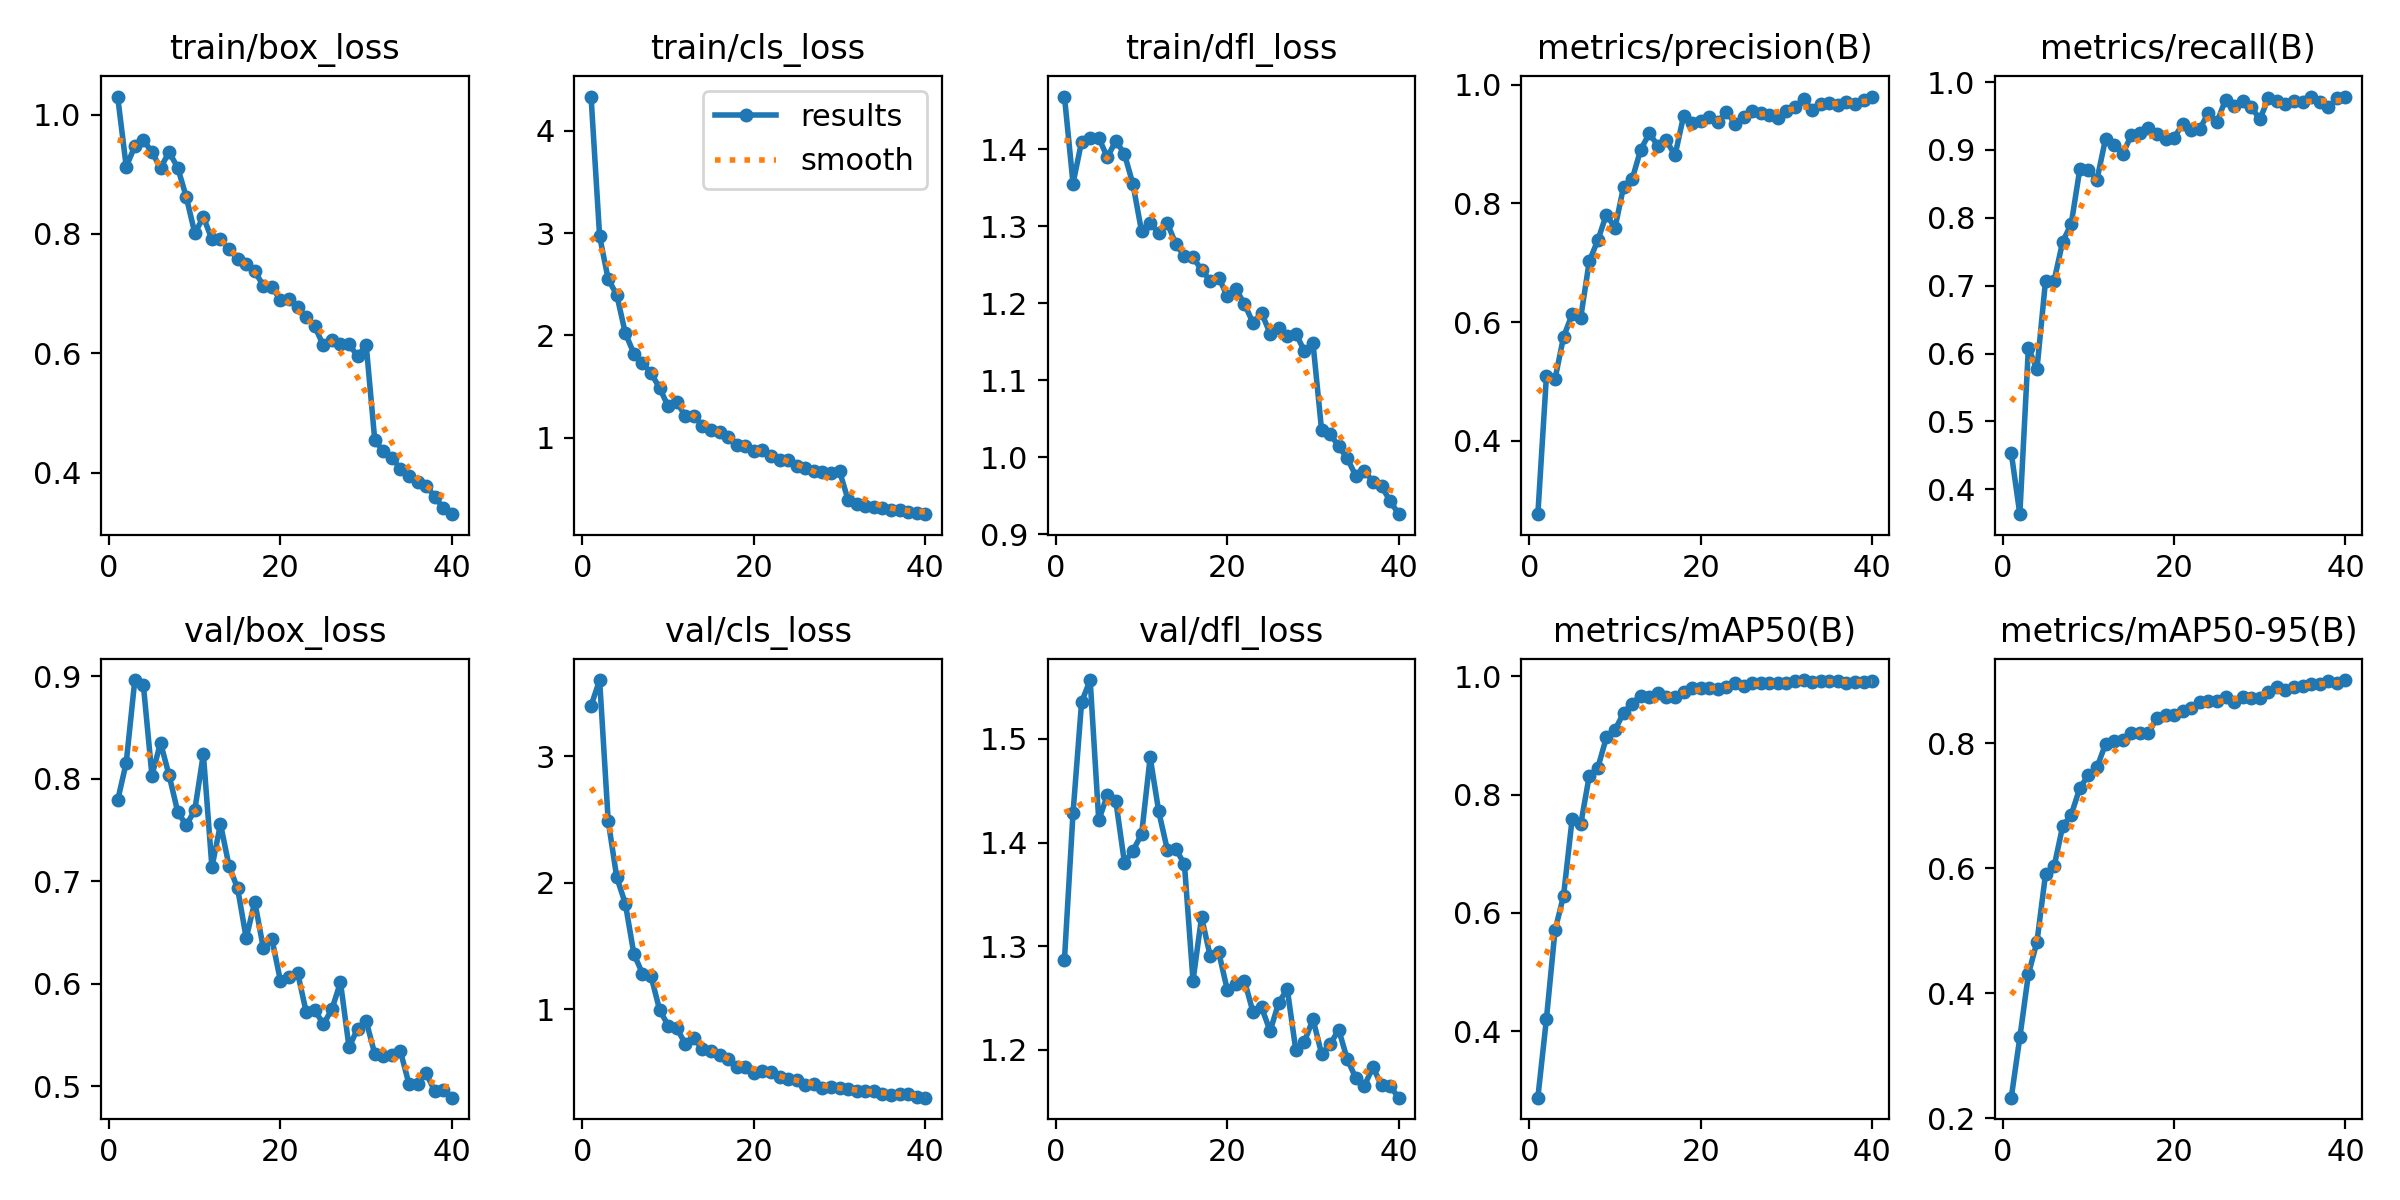

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)